## EDA del dataset de Movies

Se eligieron las siguientes variables para el análisis:

* Cuantitativas:
  * budget
  * popularity
  * revenue
  * runtime
  * vote_average
  * vote_count
* Cualitativas:
  * production_companies (desanidar)
  * title

### Se realizan las trasnformaciones necasarias para realizar el EDA

1. Se conservan columnas relevantes
2. Se desanidan columnas relevantes

In [1]:
#Se importan las librerias necesarias

import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from wordcloud import WordCloud

In [2]:
#lectura de columnas relevantes
#
movies_eda = pd.read_csv('data/movies_depurado.csv',delimiter = ',' , usecols=['id', 'budget','popularity','production_companies','revenue','runtime','title','vote_average','vote_count'], encoding = "utf-8",low_memory=False)
movies_eda.head()

,budget,id,popularity,production_companies,revenue,runtime,title,vote_average,vote_count
0,30000000,862,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",373554033.0,81.0,Toy Story,7.7,5415.0
1,65000000,8844,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",262797249.0,104.0,Jumanji,6.9,2413.0
2,0,15602,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",0.0,101.0,Grumpier Old Men,6.5,92.0
3,16000000,31357,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,81452156.0,127.0,Waiting to Exhale,6.1,34.0
4,0,11862,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",76578911.0,106.0,Father of the Bride Part II,5.7,173.0


In [6]:
movies_eda.shape

(45332, 8)

### EDA de variables cuantitativas

Se reralizará el EDA de las variables cuantitativas antes de desanidar

In [43]:
#obtenemos una rapida descripcion de las variables
movies_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45332 entries, 0 to 45331
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45332 non-null  int64  
 1   id                    45332 non-null  int64  
 2   popularity            45332 non-null  float64
 3   production_companies  45332 non-null  object 
 4   revenue               45332 non-null  float64
 5   runtime               45088 non-null  float64
 6   title                 45332 non-null  object 
 7   vote_average          45332 non-null  float64
 8   vote_count            45332 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.1+ MB


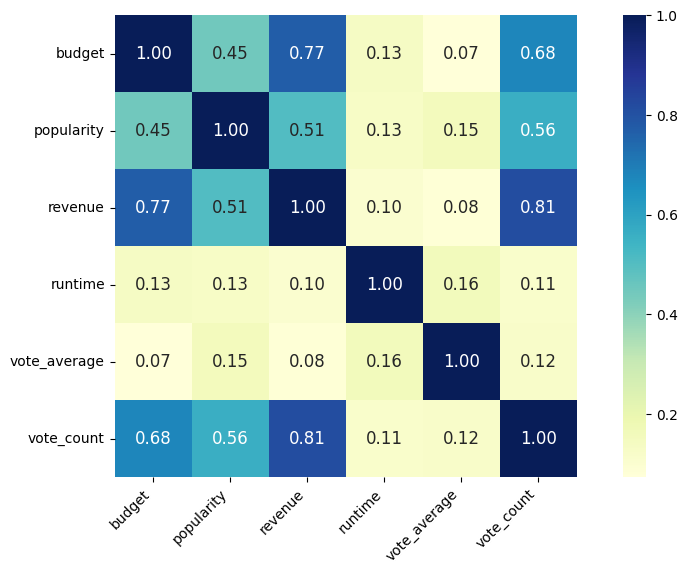

In [3]:
'''
Estudiamos la correlacion entre las variables cuantitativas
'''


movies_cuanti = movies_eda.drop(columns = ['id','production_companies','title'])

corr = movies_cuanti.corr()  #is used for find corelation
plt.figure(figsize=(12,6))
sns.heatmap(movies_cuanti.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 12  }, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

`Se puede observar una alta correlación entre budget y revenue, revenue y vote_count, y vote_count y budget`

Veamos la relacion entre la popularidad y el presupuesto:

In [4]:
# Tomamos como coordenadas en x los budgets
x = movies_eda.budget.values
# Tomamos como coordenadas en y la popularidad
y = movies_eda.popularity.values



[Text(0.5, 0, 'Presupuesto (usd)'),
 Text(0, 0.5, 'Popularidad'),
 Text(0.5, 1.0, 'Presupuesto vs. popularidad de movies')]

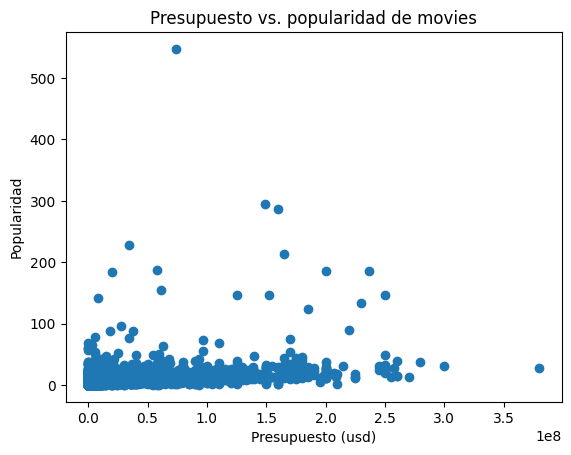

In [5]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='Presupuesto (usd)', ylabel='Popularidad',
       title='Presupuesto vs. popularidad de movies')

Se observa que aumenta levemente la popularidad a medida que aumenta el budget, eliminaremos outliers y volveremos a generar la grafica.

In [13]:
#movies_eda[movies_eda["popularity"] != movies_eda["popularity"].max()].popularity.describe()
#movies_eda[movies_eda["popularity"] <100].popularity.describe()
#tomamos los valores donde la popularidad es menor a 100
# Tomamos como coordenadas en x los budgets
x = movies_eda[movies_eda["popularity"] <100].budget.values
# Tomamos como coordenadas en y la popularidad
y = movies_eda[movies_eda["popularity"] <100].popularity.values


[Text(0.5, 0, 'Presupuesto (usd)'),
 Text(0, 0.5, 'Popularidad'),
 Text(0.5, 1.0, 'Presupuesto vs. popularidad de movies')]

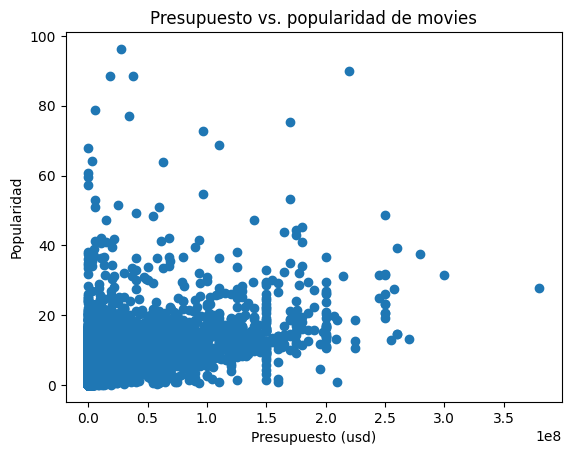

In [14]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='Presupuesto (usd)', ylabel='Popularidad',
       title='Presupuesto vs. popularidad de movies')

Es mas notorio el aumento de la popularidad en a medida que aumenta el presupuesto, pero hay muchas movies con baja popularidad y alto presupuesto.

Análisis de variables categoricas

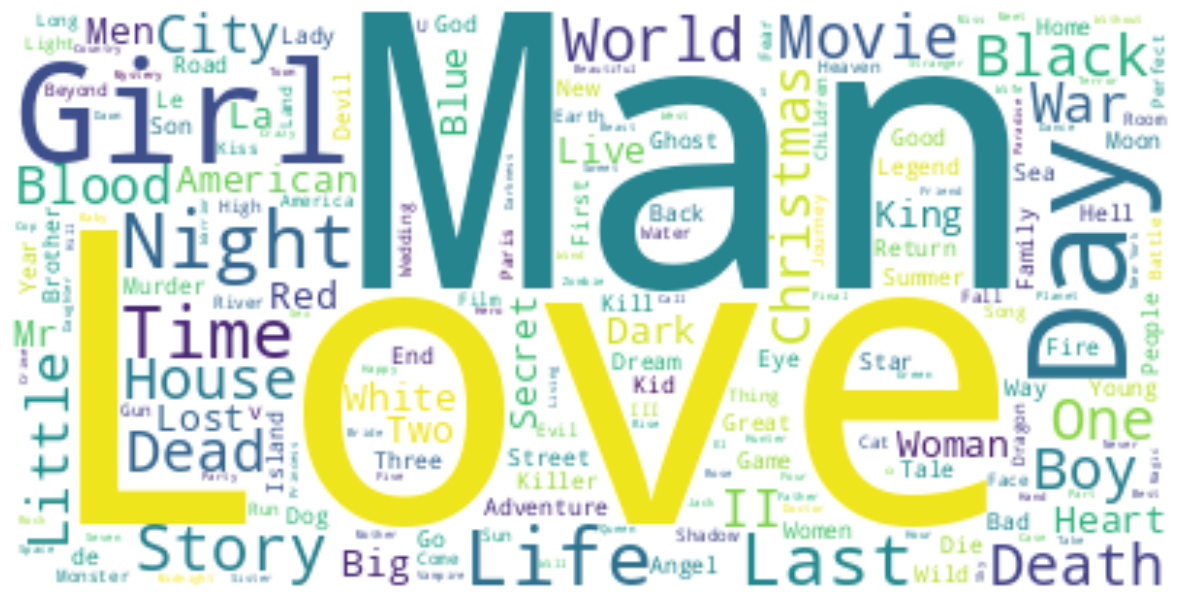

In [14]:
text = " ".join(i for i in movies_eda['title'])

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Se puede apreciar con claridad cuales son las palabras preferidas a la hora de ponerle títulos a las peliculas: Man, Love, Girl. Podriamos tener un insight si hacemos una nube de palabras de las películas que han tenido un puntaje promedio superior a la media. 

In [36]:
#Se desanida production_companies

rows = []
for item, fila in movies_eda.iterrows():    
    row = fila.to_list()    
    row.pop(2)

    comp = (ast.literal_eval(fila['production_companies']))    
    
    for c in comp:
        new_row = row.copy()
        new_row.insert(2, c['name'])
        rows.append(new_row)

movies_eda_flat = pd.DataFrame(rows, columns=movies_eda.columns)

movies_eda_flat.head()


,budget,popularity,production_companies,revenue,runtime,title,vote_average,vote_count
0,30000000,21.946943,Pixar Animation Studios,373554033.0,81.0,Toy Story,7.7,5415.0
1,65000000,17.015539,TriStar Pictures,262797249.0,104.0,Jumanji,6.9,2413.0
2,65000000,17.015539,Teitler Film,262797249.0,104.0,Jumanji,6.9,2413.0
3,65000000,17.015539,Interscope Communications,262797249.0,104.0,Jumanji,6.9,2413.0
4,0,11.712900,Warner Bros.,0.0,101.0,Grumpier Old Men,6.5,92.0


In [38]:
#guardar como csv
movies_eda_flat.to_csv(r'data/movies_eda_flat.csv',index=False)

In [39]:
movies_eda_flat.shape

(70437, 8)

In [40]:
movies_eda_flat.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,7.043700e+04,70437.000000,7.043700e+04,70278.000000,70437.000000,70437.000000
mean,9.323176e+06,4.756480,2.400186e+07,100.788867,5.920550,236.543010
std,2.602387e+07,8.207477,9.369362e+07,31.180564,1.494048,734.864884
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.853913,0.000000e+00,90.000000,5.400000,7.000000
50%,0.000000e+00,2.535419,0.000000e+00,99.000000,6.100000,24.000000
75%,4.000000e+06,7.102076,6.749180e+05,111.000000,6.800000,115.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000
